# 6. 데이터정제 실전과제

6.1 데이터 불러오기 및 탐색

In [1]:
import pandas as pd

   housing_age  income  bedrooms  households     rooms  house_value
0           23  6.7770  0.141112    2.442244  8.103960       500000
1           49  6.0199  0.160984    2.726688  5.752412       500000
2           35  5.1155  0.249061    1.902676  3.888078       500000
3           32  4.7109  0.231383    1.913669  4.508393       500000
4           21  4.5625  0.255583    3.092664  4.667954       500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17914 entries, 0 to 17913
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  17914 non-null  int64  
 1   income       17914 non-null  float64
 2   bedrooms     17914 non-null  float64
 3   households   17914 non-null  float64
 4   rooms        17914 non-null  float64
 5   house_value  17914 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 839.8 KB
None
        housing_age        income      bedrooms    households         rooms  \
count  17914

array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

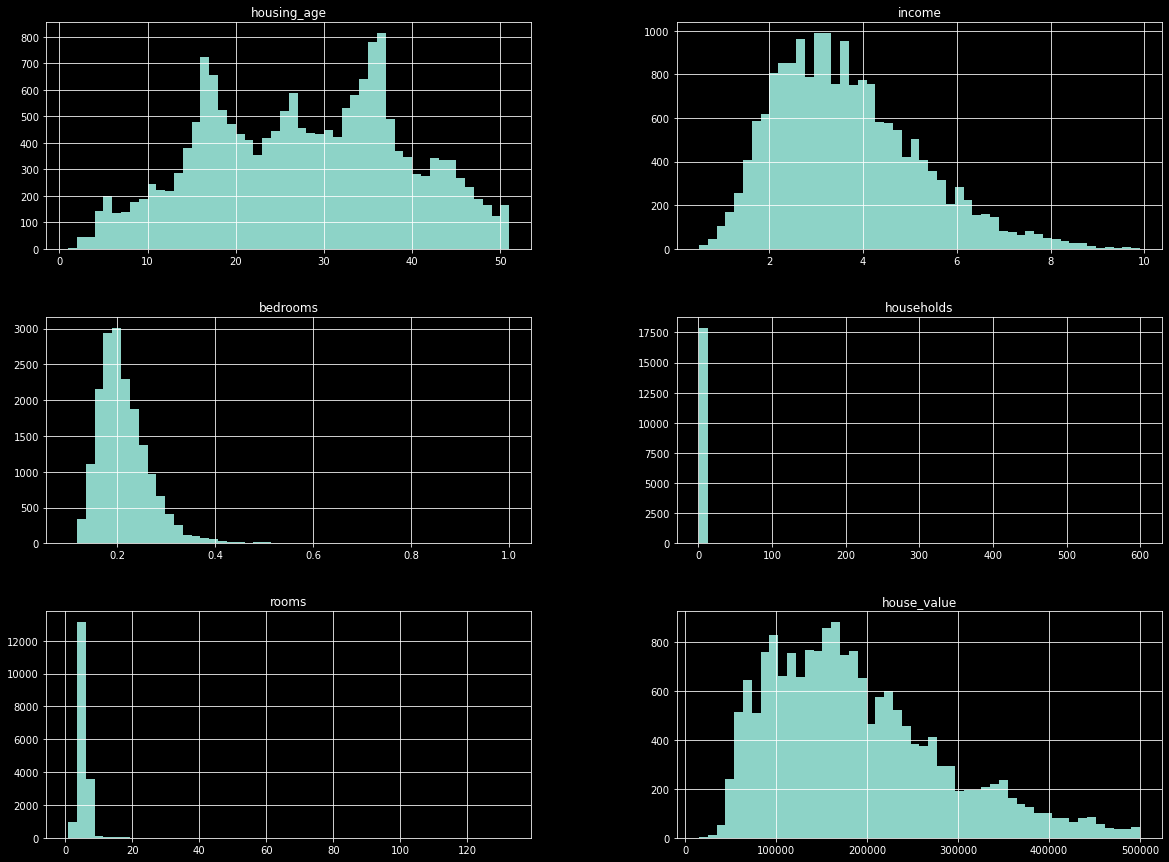

In [2]:
data = pd.read_csv('../data/house_raw.csv')
print(data.head())
print(data.info())
print(data.describe())
data.hist(bins=50, figsize=(20, 15))

6.2 선형회기 적용 (정제 전 데이터)

In [3]:
# X = data[data.columns[0:5]]
X = data[['housing_age', 'income', 'bedrooms', 'households', 'rooms']]
y = data[['house_value']]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f"X_train: {X_train.shape} {type(X_train)}")
print(f"y_train: {y_train.shape} {type(y_train)}")
print()
print(f"X_test : {X_test.shape} {type(X_test)}")
print(f"y_test : {y_test.shape} {type(y_test)}")

X_train: (13435, 5) <class 'pandas.core.frame.DataFrame'>
y_train: (13435, 1) <class 'pandas.core.frame.DataFrame'>

X_test : (4479, 5) <class 'pandas.core.frame.DataFrame'>
y_test : (4479, 1) <class 'pandas.core.frame.DataFrame'>


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train)

X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

print(f"X_train (scaled): {X_scaled_minmax_train.shape} {type(X_scaled_minmax_train)}")
print(f"X_test (scaled): {X_scaled_minmax_test.shape} {type(X_scaled_minmax_test)}")

X_train (scaled): (13435, 5) <class 'numpy.ndarray'>
X_test (scaled): (4479, 5) <class 'numpy.ndarray'>


In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

print(y_train.shape)

(13435, 1)


In [7]:
# train
pred_train = model.predict(X_scaled_minmax_train)
print(f"pred_train: {pred_train.shape}")
print(f"train R-square: {model.score(X_scaled_minmax_train, y_train)}")
print()

# test
pred_test = model.predict(X_scaled_minmax_test)
print(f"pred_test: {pred_test.shape}")
print(f"test R-square: {model.score(X_scaled_minmax_test, y_test)}")

pred_train: (13435, 1)
train R-square: 0.5463729131516732

pred_test: (4479, 1)
test R-square: -2.8220648010161233


6.3 데이터 정제를 위한 세부 검토

6.4 정제 데이터셋 생성

   housing_age  income  bedrooms  households     rooms  house_value
0           23  6.7770  0.141112    2.442244  8.103960       500000
1           49  6.0199  0.160984    2.726688  5.752412       500000
2           35  5.1155  0.249061    1.902676  3.888078       500000
3           32  4.7109  0.231383    1.913669  4.508393       500000
4           21  4.5625  0.255583    3.092664  4.667954       500000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17689 entries, 0 to 17912
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  17689 non-null  int64  
 1   income       17689 non-null  float64
 2   bedrooms     17689 non-null  float64
 3   households   17689 non-null  float64
 4   rooms        17689 non-null  float64
 5   house_value  17689 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 967.4 KB
None
        housing_age        income      bedrooms    households         rooms  \
count  17689

array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

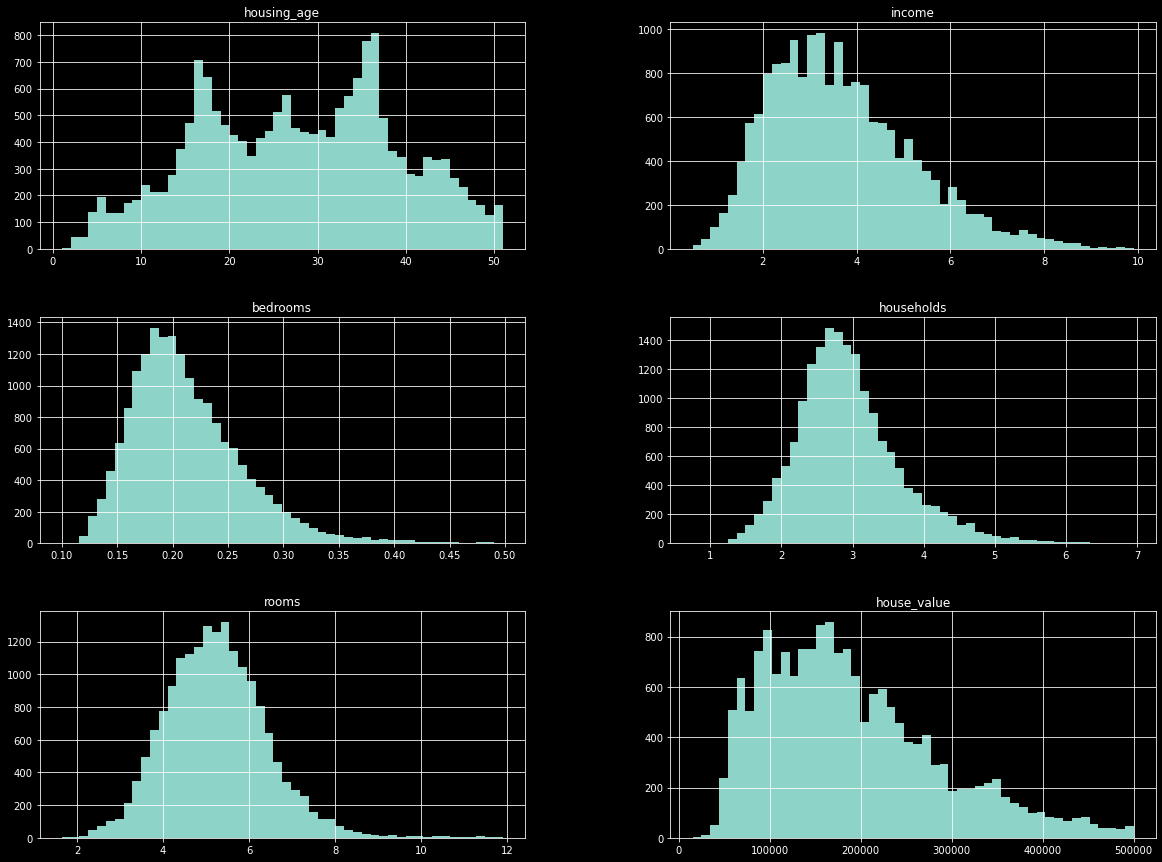

In [8]:
new_data = data[(data['bedrooms'] < 0.5) & (data['households'] < 7) & (data['rooms'] < 12)]
print(new_data.head())
print(new_data.info())
print(new_data.describe())
new_data.hist(bins=50, figsize=(20, 15))

In [9]:
X = new_data[['housing_age', 'income', 'bedrooms', 'households', 'rooms']]
y = new_data[['house_value']]

# train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# minmax
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train)

X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

# linear regression
model = LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

# train
pred_train = model.predict(X_scaled_minmax_train)
print(f"pred_train: {pred_train.shape}")
print(f"train R-square: {model.score(X_scaled_minmax_train, y_train)}")
print()

# test
pred_test = model.predict(X_scaled_minmax_test)
print(f"pred_test: {pred_test.shape}")
print(f"test R-square: {model.score(X_scaled_minmax_test, y_test)}")

# save train data
# new_data.to_csv('house_price.csv', index=False)

pred_train: (13266, 1)
train R-square: 0.5706921210926263

pred_test: (4423, 1)
test R-square: 0.5826083517811863
